# NLP Libraries

In [1]:
import os
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

# Visual Libraries

In [2]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# ML Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nlp = spacy.load("en_core_web_sm") 

In [7]:
tree = ET.parse("covid_data.xml")
root = tree.getroot()

In [8]:
tree 

In [9]:
root

<Element 'articles' at 0x000002B4C8DE4220>

In [10]:

root=ET.tostring(root, encoding='utf8').decode('utf8')

In [11]:
print(root)

<?xml version='1.0' encoding='utf8'?>
<articles generated_by="chatgpt" generated_on="2025-11-28" dataset="synthetic_covid_corpus_v1">

  <article id="covid-0001">
    <title>COVID-19 Vaccine Study</title>
    <date>2020-12-15</date>
    <authors>
      <author>Jane A. Miller</author>
      <author>Rohit K. Patel</author>
      <author>Maria S. Gomez</author>
    </authors>
    <affiliations>
      <affiliation>Department of Infectious Diseases, New York University</affiliation>
      <affiliation>Vaccine Research Center, University of Delhi</affiliation>
    </affiliations>
    <abstract>
      A randomized, placebo-controlled trial evaluated the efficacy and safety of two-dose COVID-19 vaccines in adults.
      Primary endpoints included symptomatic infection and hospitalization; secondary endpoints included immunogenicity and adverse events.
    </abstract>
    <body>
      The COVID-19 pandemic caused significant global disruption. Researchers from Pfizer and Moderna evaluated vacci

In [12]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [14]:
def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

In [15]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text=re.sub('  ','',text)
    return text

In [16]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [17]:
sample = denoise_text(root)

In [18]:
print(sample)

 COVID-19 Vaccine Study 2020-12-15 Jane A. Miller Rohit K. Patel Maria S. Gomez Department of Infectious Diseases, New York University Vaccine Research Center, University of Delhi A randomized, placebo-controlled trial evaluated the efficacy and safety of two-dose COVID-19 vaccines in adults. Primary endpoints included symptomatic infection and hospitalization; secondary endpoints included immunogenicity and adverse events. The COVID-19 pandemic caused significant global disruption. Researchers from Pfizer and Moderna evaluated vaccine efficacy in multi-center clinical trials conducted in the United States during 2020. Participants ranged from 18 to 85 years of age and received two doses separated by 21 days for Pfizer or 28 days for Moderna. Results demonstrated a 94.5% reduction in symptomatic COVID-19 cases compared with placebo and a substantial reduction in severe disease and hospitalization. Immunogenicity assays showed robust neutralizing antibody titres after the second dose, w

In [19]:
def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

In [20]:
tree = ET.parse("covid_data.xml")
root = tree.getroot()    # <-- keep this as XML, do NOT convert to string

documents = []
for article in root.findall('article'):
    body_node = article.find('body')
    body = body_node.text if body_node is not None else ""
    clean_text = denoise_text(body)
    preprocessed = preprocess_text(clean_text)
    documents.append(preprocessed)

## NER

In [21]:
print("=== NER ===")
for i, doc_text in enumerate(documents):
    doc = nlp(doc_text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    print(f"\nArticle {i+1}: {entities}")

=== NER ===

Article 1: [('pfizer moderna', 'PERSON'), ('two', 'CARDINAL'), ('day', 'DATE'), ('second', 'ORDINAL'), ('three month', 'DATE'), ('new york', 'GPE')]

Article 2: []

Article 3: [('third', 'ORDINAL'), ('six nine month', 'DATE'), ('hour', 'TIME')]

Article 4: [('year old', 'DATE')]

Article 5: [('mrna vaccine platform', 'PERSON')]

Article 6: []

Article 7: []

Article 8: []

Article 9: []

Article 10: [('vaccine hesitancy', 'PERSON')]

Article 11: [('day week', 'DATE')]

Article 12: []


# TFIDF

In [22]:
tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(documents)
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 172 stored elements and shape (12, 50)>
  Coords	Values
  (0, 48)	0.12104932026120735
  (0, 7)	0.15693466535353887
  (0, 15)	0.2182810679829231
  (0, 12)	0.4365621359658462
  (0, 34)	0.38564002089174076
  (0, 4)	0.17307087991919962
  (0, 9)	0.19282001044587038
  (0, 13)	0.19282001044587038
  (0, 39)	0.15693466535353887
  (0, 2)	0.15693466535353887
  (0, 16)	0.38564002089174076
  (0, 35)	0.17307087991919962
  (0, 19)	0.19282001044587038
  (0, 20)	0.14329169033250946
  (0, 40)	0.15693466535353887
  (0, 3)	0.19282001044587038
  (0, 29)	0.2182810679829231
  (0, 1)	0.19282001044587038
  (0, 31)	0.19282001044587038
  (1, 48)	0.22776598111845303
  (1, 7)	0.14764386098415733
  (1, 34)	0.18140473140908817
  (1, 9)	0.18140473140908817
  (1, 13)	0.18140473140908817
  (1, 39)	0.14764386098415733
  :	:
  (10, 7)	0.47085273040588066
  (10, 12)	0.3274554943744727
  (10, 4)	0.25963319251397576
  (10, 20)	0.2149597843329985
  (10, 31)	0.2892

In [23]:
print("\n=== TF-IDF Features ===")
print(tfidf.get_feature_names_out())


=== TF-IDF Features ===
['access' 'adult' 'antibody' 'booster' 'case' 'chain' 'clinic' 'clinical'
 'cold' 'compared' 'concern' 'country' 'day' 'disease' 'distribution'
 'dos' 'dose' 'early' 'emergence' 'fatigue' 'health' 'high' 'improved'
 'included' 'increased' 'indicated' 'mrna' 'neutralization' 'npis' 'older'
 'policy' 'population' 'public' 'reduced' 'reduction' 'response' 'rollout'
 'safety' 'several' 'showed' 'study' 'supply' 'surge' 'surveillance'
 'symptom' 'targeted' 'therapy' 'vaccination' 'vaccine' 'variant']


# BOW

In [24]:
bow = CountVectorizer(max_features=50)
bow_matrix = bow.fit_transform(documents)
print(bow_matrix)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 172 stored elements and shape (12, 50)>
  Coords	Values
  (0, 48)	1
  (0, 7)	1
  (0, 15)	1
  (0, 12)	2
  (0, 34)	2
  (0, 4)	1
  (0, 9)	1
  (0, 13)	1
  (0, 39)	1
  (0, 2)	1
  (0, 16)	2
  (0, 35)	1
  (0, 19)	1
  (0, 20)	1
  (0, 40)	1
  (0, 3)	1
  (0, 29)	1
  (0, 1)	1
  (0, 31)	1
  (1, 48)	2
  (1, 7)	1
  (1, 34)	1
  (1, 9)	1
  (1, 13)	1
  (1, 39)	1
  :	:
  (10, 7)	2
  (10, 12)	1
  (10, 4)	1
  (10, 20)	1
  (10, 31)	1
  (10, 32)	1
  (10, 42)	1
  (10, 43)	1
  (10, 45)	1
  (10, 23)	1
  (10, 17)	1
  (11, 48)	2
  (11, 39)	1
  (11, 20)	1
  (11, 18)	1
  (11, 49)	1
  (11, 36)	1
  (11, 33)	1
  (11, 30)	1
  (11, 14)	1
  (11, 41)	1
  (11, 5)	1
  (11, 11)	1
  (11, 8)	1
  (11, 0)	1


In [25]:
print("\n=== BoW Features ===")
print(bow.get_feature_names_out())


=== BoW Features ===
['access' 'adult' 'antibody' 'booster' 'case' 'chain' 'clinic' 'clinical'
 'cold' 'compared' 'concern' 'country' 'day' 'disease' 'distribution'
 'dos' 'dose' 'early' 'emergence' 'fatigue' 'health' 'high' 'improved'
 'included' 'increased' 'indicated' 'mrna' 'neutralization' 'npis' 'older'
 'policy' 'population' 'public' 'reduced' 'reduction' 'response' 'rollout'
 'safety' 'several' 'showed' 'study' 'supply' 'surge' 'surveillance'
 'symptom' 'targeted' 'therapy' 'vaccination' 'vaccine' 'variant']


In [26]:
all_text = " ".join(documents)

In [27]:
wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(all_text)

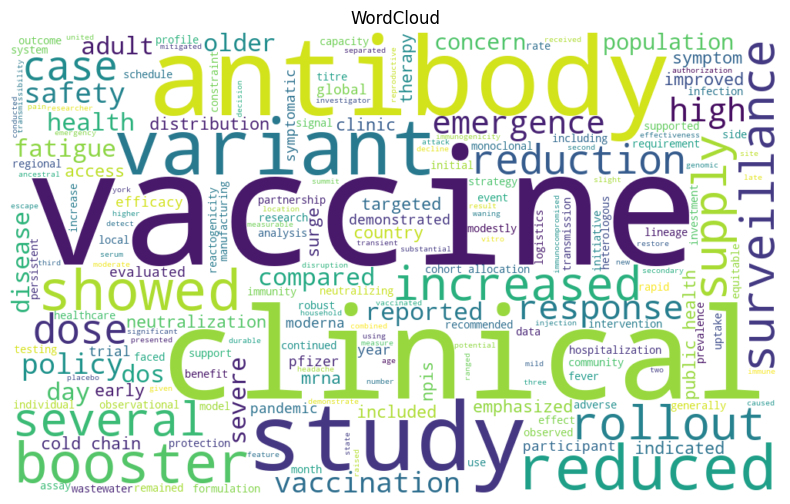

In [28]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud")
plt.show()

In [29]:
print("\n=== SENTIMENT ANALYSIS ===")
for i, text in enumerate(documents):
    sentiment = TextBlob(text).sentiment.polarity
    print(f"Article {i+1} Sentiment Score: {sentiment}")


=== SENTIMENT ANALYSIS ===
Article 1 Sentiment Score: 0.13892045454545454
Article 2 Sentiment Score: -0.00966666666666666
Article 3 Sentiment Score: 0.10416666666666667
Article 4 Sentiment Score: 0.07333333333333335
Article 5 Sentiment Score: -0.12218749999999999
Article 6 Sentiment Score: 0.11249999999999999
Article 7 Sentiment Score: 0.0050000000000000044
Article 8 Sentiment Score: 0.09107142857142857
Article 9 Sentiment Score: 0.18571428571428572
Article 10 Sentiment Score: 0.1
Article 11 Sentiment Score: 0.03333333333333333
Article 12 Sentiment Score: -0.06250000000000001


In [30]:
labels = [1 if i % 2 == 0 else 0 for i in range(len(documents))]  # dummy binary labels

In [31]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)

In [32]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [33]:
print("\n=== SVM Accuracy ===")
print(accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


=== SVM Accuracy ===
0.25
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



In [34]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [35]:
print("\n=== Logistic Regression Accuracy ===")
print(accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))


=== Logistic Regression Accuracy ===
0.25
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

